In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-stock-price-dataset/Zomato Dataset.csv


In [8]:
df = pd.read_csv('/kaggle/input/zomato-stock-price-dataset/Zomato Dataset.csv',parse_dates=[0])

/tmp/ipykernel_33/2092570806.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('/kaggle/input/zomato-stock-price-dataset/Zomato Dataset.csv',parse_dates=[0])


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       698 non-null    datetime64[ns]
 1   Open       698 non-null    float64       
 2   High       698 non-null    float64       
 3   Low        698 non-null    float64       
 4   Close      698 non-null    float64       
 5   Adj Close  698 non-null    float64       
 6   Volume     698 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 38.3 KB


In [6]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,23-07-2021,116.000000,138.899994,115.000000,126.000000,126.000000,694895290
1,26-07-2021,126.349998,143.750000,125.300003,140.649994,140.649994,249723854
2,27-07-2021,141.699997,147.800003,127.750000,132.899994,132.899994,240341900
3,28-07-2021,131.000000,135.000000,123.550003,131.199997,131.199997,159793731
4,29-07-2021,134.949997,144.000000,132.199997,141.550003,141.550003,117973089


In [12]:
df.Date.dt.year.unique()

array([2021, 2022, 2023, 2024], dtype=int32)

In [13]:
df['Year'] = df.Date.dt.year
df['Month'] = df.Date.dt.strftime('%b')
df['Quarter'] = df.Date.dt.to_period('Q').dt.strftime('Q%q')

<Axes: xlabel='Month'>

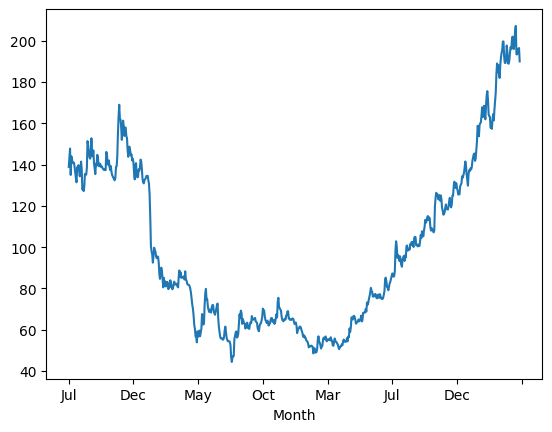

In [18]:
df.plot(kind='line',x='Month',y='High',legend=False)


In [20]:
df['Ratio_High_Low'] = df['High']/df['Low']

In [21]:
sum(df.Close == df['Adj Close'])

698

In [23]:
df.drop(columns='Adj Close',inplace=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

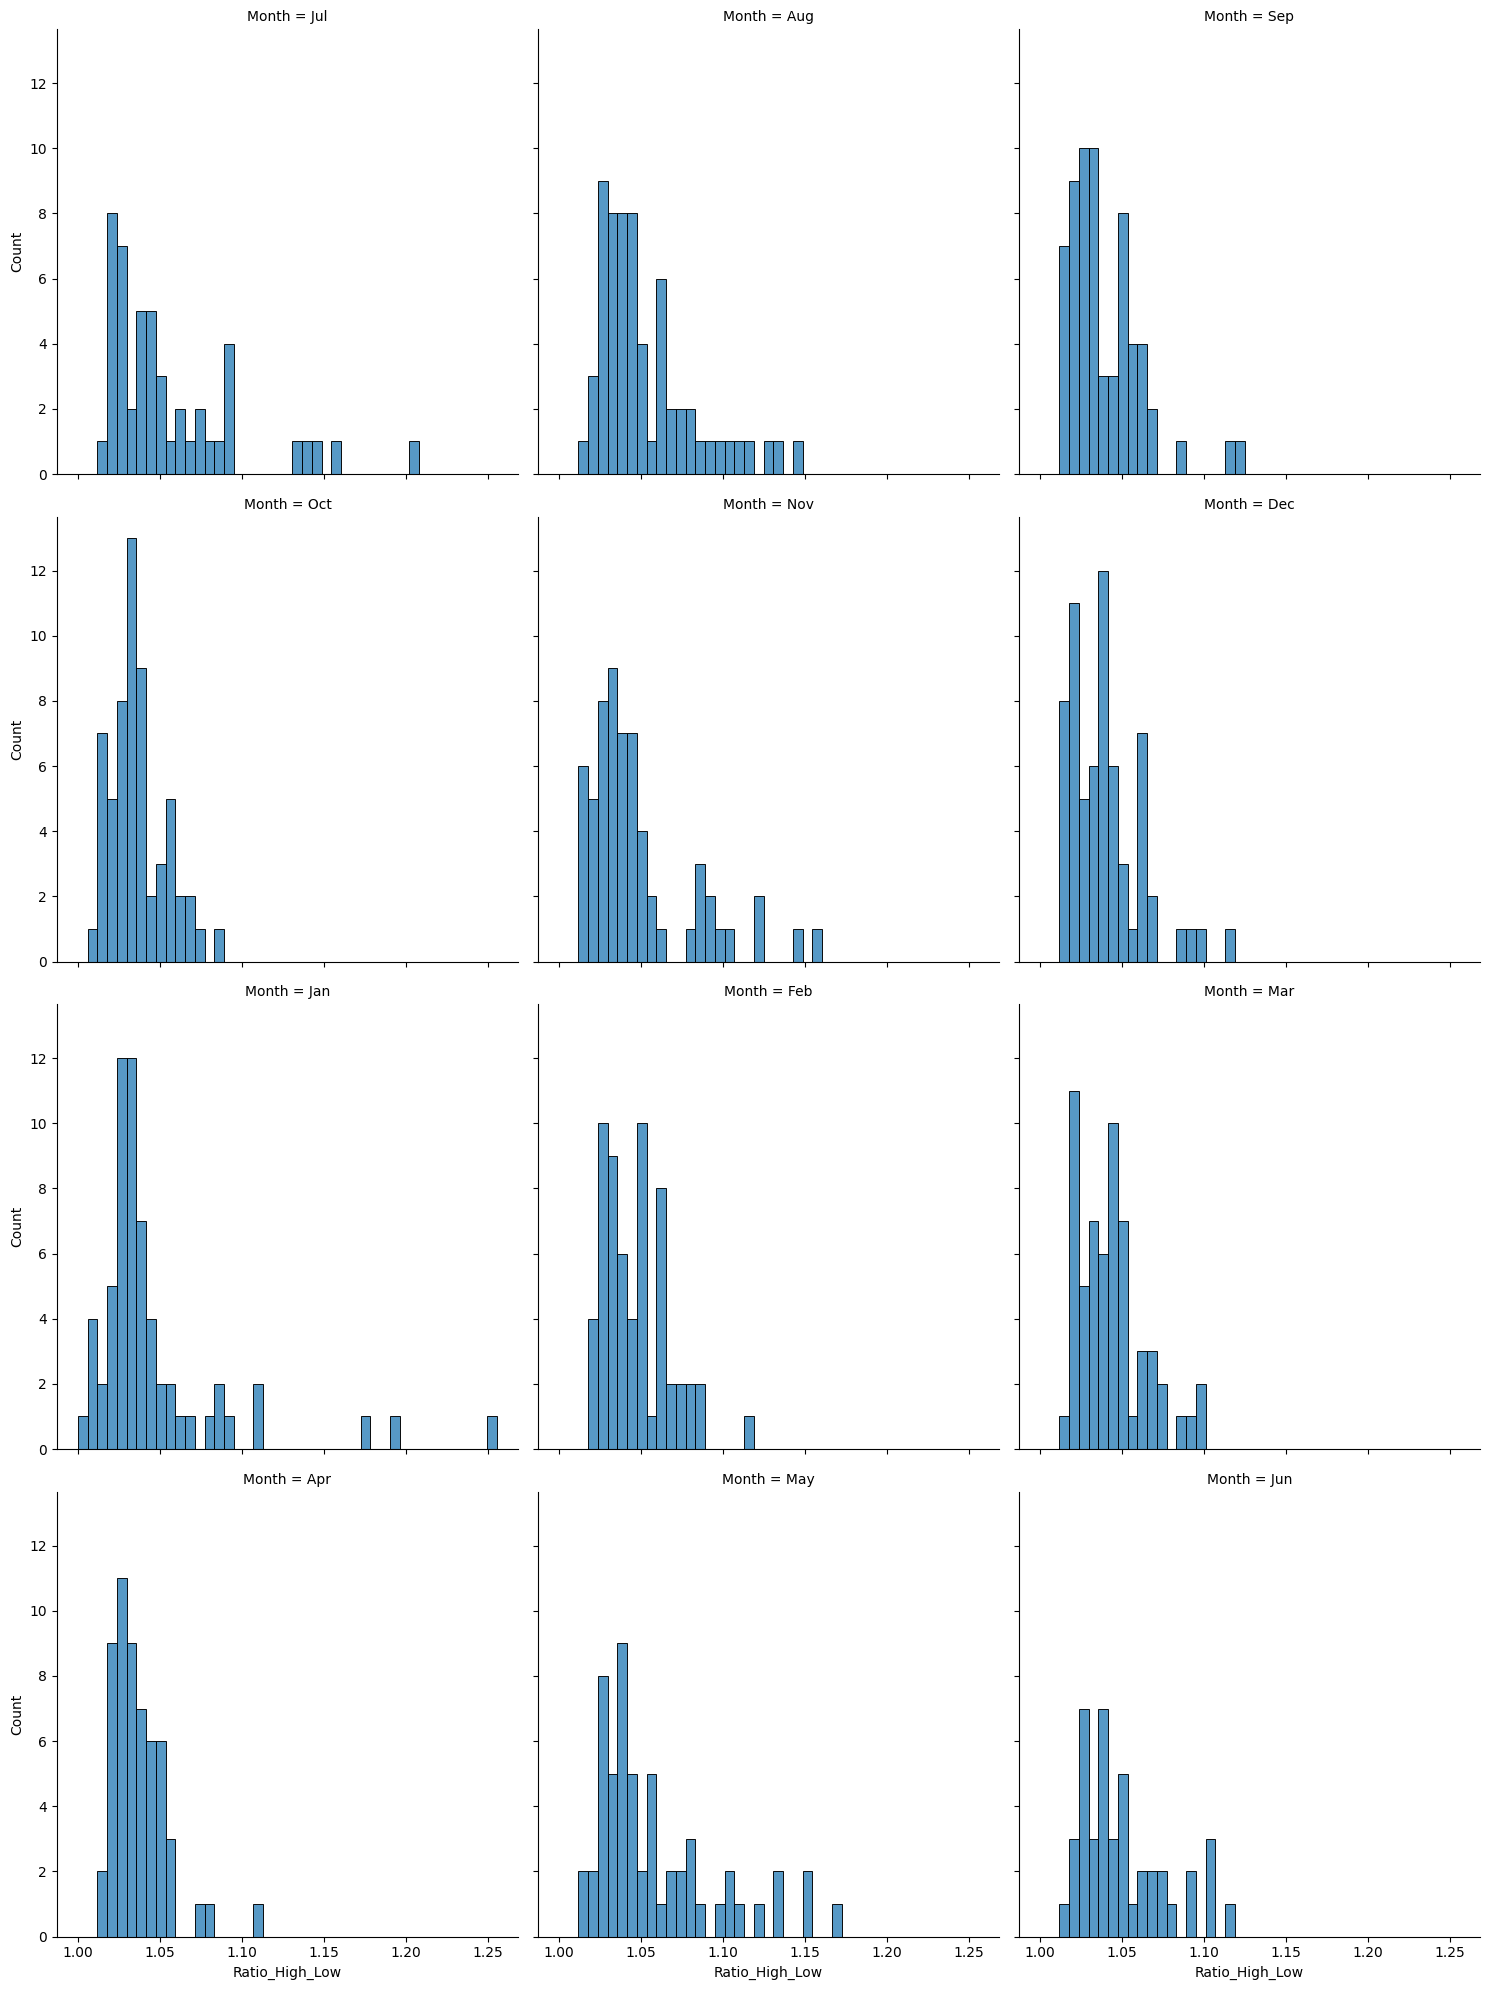

In [27]:
sns.displot(data=df,x='Ratio_High_Low',col='Month',col_wrap=3)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

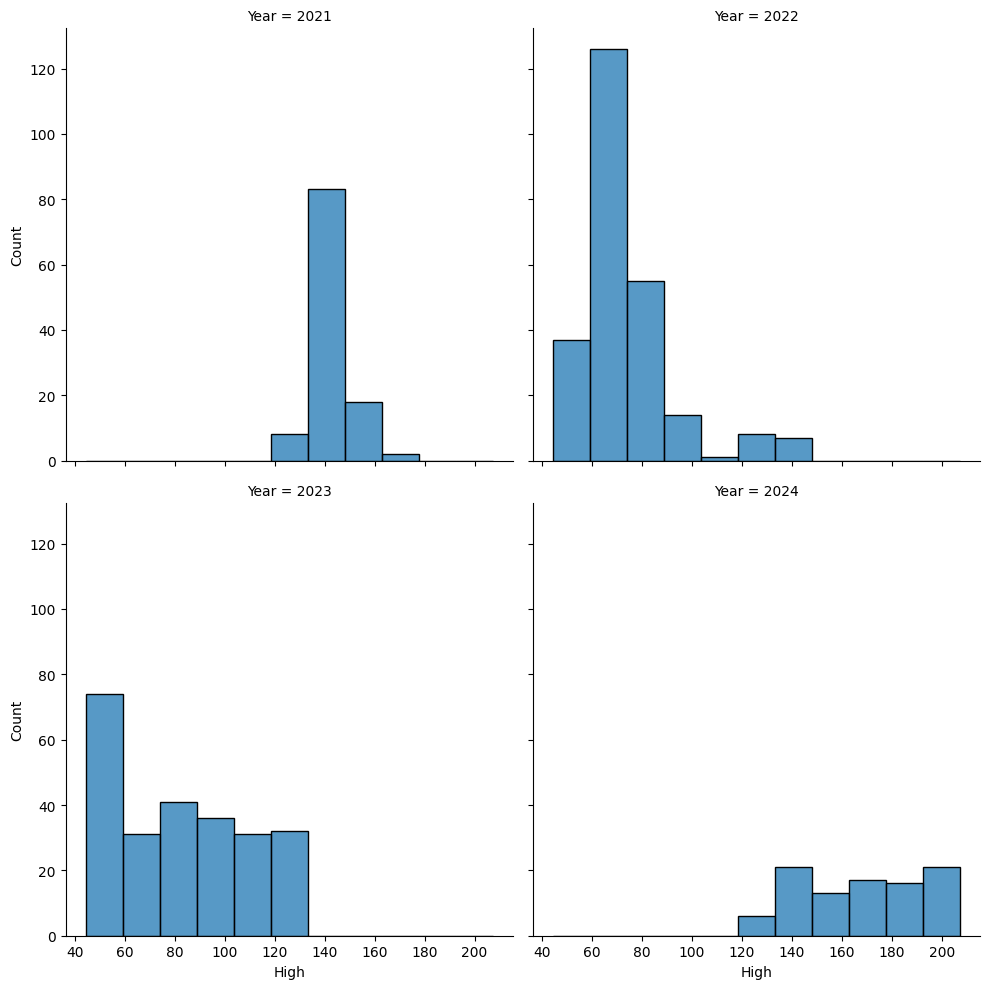

In [30]:
sns.displot(data=df, x='High',col='Year', col_wrap=2)

In [32]:
_2021 = df[df.Year==2021]
_2022 =df[df.Year==2022]
_2023 = df[df.Year==2023]
_2024 = df[df.Year==2024]

In [34]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [38]:
from scipy.stats import f_oneway
ftest,pval = f_oneway(_2021.High,_2022.High,_2023.High,_2024.High)
pval

4.87868474464287e-200

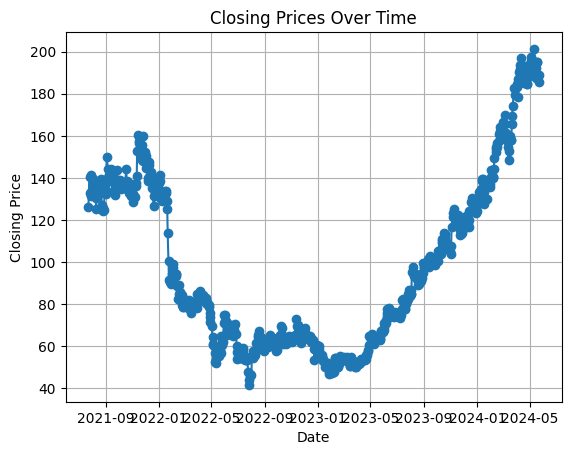

In [44]:
plt.plot(df['Date'], df['Close'], marker='o')
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

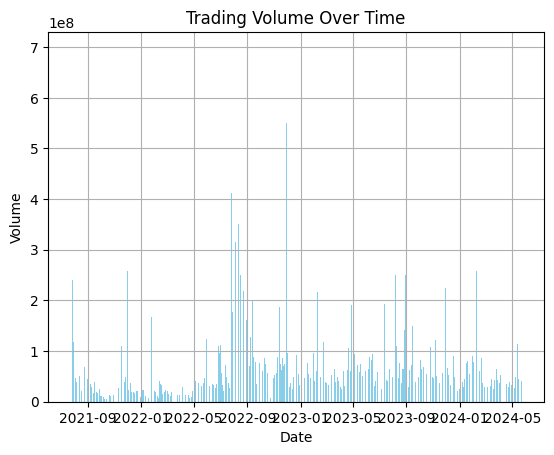

In [51]:
fig, ax = plt.subplots()
ax.bar(df['Date'], df['Volume'], color='skyblue')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

In [52]:
df['Daily Return'] = df['Close'].pct_change()
print(df[['Date', 'Daily Return']])

          Date  Daily Return
0   2021-07-23           NaN
1   2021-07-26      0.116270
2   2021-07-27     -0.055101
3   2021-07-28     -0.012792
4   2021-07-29      0.078887
..         ...           ...
693 2024-05-15      0.025093
694 2024-05-16      0.016667
695 2024-05-17     -0.001793
696 2024-05-21     -0.029510
697 2024-05-22     -0.019038

[698 rows x 2 columns]


In [53]:
df['MA5'] = df['Close'].rolling(window=5).mean()
print(df[['Date', 'Close', 'MA5']])

          Date       Close         MA5
0   2021-07-23  126.000000         NaN
1   2021-07-26  140.649994         NaN
2   2021-07-27  132.899994         NaN
3   2021-07-28  131.199997         NaN
4   2021-07-29  141.550003  134.459998
..         ...         ...         ...
693 2024-05-15  192.000000  194.030002
694 2024-05-16  195.199997  194.020001
695 2024-05-17  194.850006  192.730002
696 2024-05-21  189.100006  191.690002
697 2024-05-22  185.500000  191.330002

[698 rows x 3 columns]


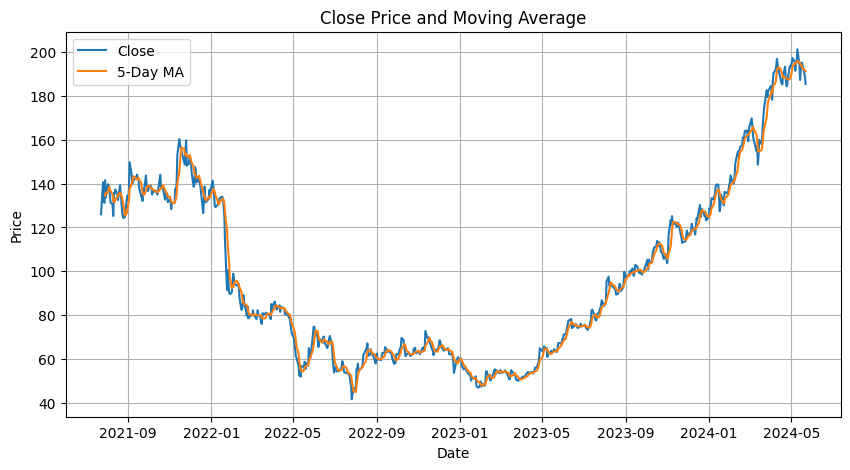

In [54]:
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Close'], label='Close')
plt.plot(df['Date'], df['MA5'], label='5-Day MA')
plt.title('Close Price and Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [56]:
correlation_matrix = df.select_dtypes('number').corr()
print(correlation_matrix)

                    Open      High       Low     Close    Volume      Year  \
Open            1.000000  0.998379  0.998209  0.997059 -0.202670  0.144649   
High            0.998379  1.000000  0.997625  0.998770 -0.175964  0.140771   
Low             0.998209  0.997625  1.000000  0.998563 -0.209558  0.153515   
Close           0.997059  0.998770  0.998563  1.000000 -0.186526  0.149275   
Volume         -0.202670 -0.175964 -0.209558 -0.186526  1.000000  0.033500   
Year            0.144649  0.140771  0.153515  0.149275  0.033500  1.000000   
Ratio_High_Low -0.045221 -0.015203 -0.079065 -0.044941  0.571939 -0.172444   
Daily Return   -0.008298  0.027142  0.027219  0.056077  0.237383  0.054622   
MA5             0.997982  0.997330  0.996637  0.996448 -0.237629  0.147030   

                Ratio_High_Low  Daily Return       MA5  
Open                 -0.045221     -0.008298  0.997982  
High                 -0.015203      0.027142  0.997330  
Low                  -0.079065      0.027219  0.

In [57]:
volatility = df['Daily Return'].std()
print(f'Volatility: {volatility}')

Volatility: 0.033468199492816306
